In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__

'2.4.1'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

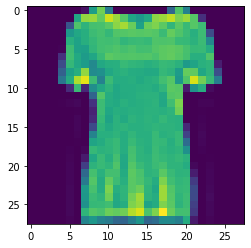

In [6]:
plt.imshow(X_train_full[10])

In [7]:
y_train_full[10]

0

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train_full[10]]

'T-shirt/top'

In [10]:
X_train_full[10]    #looking at the 28x28 image pixel value stored

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization

In [11]:
X_train_n = X_train_full/255.              # dividing by 255 as the max limit of pixel is 255 
X_test_n = X_test/255.

## Split data into train/validation/test datasets

In [12]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [13]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create the model architecture

There are two APIs for defining model in keras:
    * Sequential model API
    * Functional API

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28*28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
import pydot
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
weights, biases = model.layers[1].get_weights()          # for first layer

In [19]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])                 # using this loss function as we have multiclass label classification problem, if we had probability as output we wouldve gone with categorical cross entropy
                                                     # if we had binary classification, we can use binary cross entropy
                                                     # sgd for backpropagation 

In [28]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))       #ran this cell twice to converge

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2208 - accuracy: 0.9199 - val_loss: 0.2876 - val_accuracy: 0.8938
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2176 - accuracy: 0.9219 - val_loss: 0.2906 - val_accuracy: 0.8956
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2143 - accuracy: 0.9229 - val_loss: 0.3830 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9246 - val_loss: 0.2909 - val_accuracy: 0.8966
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2089 - accuracy: 0.9244 - val_loss: 0.2810 - val_accuracy: 0.8980
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2035 - accuracy: 0.9271 - val_loss: 0.2971 - val_accuracy: 0.8942
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2008 - accuracy: 0.9293 - val_loss: 0.2931 - val_accuracy:

In [29]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
model_history.history

{'loss': [0.22083616256713867,
  0.21759244799613953,
  0.21426239609718323,
  0.21060334146022797,
  0.2088644653558731,
  0.20350033044815063,
  0.2007768452167511,
  0.19778810441493988,
  0.19415158033370972,
  0.1912560611963272,
  0.18890324234962463,
  0.1846090406179428,
  0.1817615032196045,
  0.17963887751102448,
  0.17657004296779633,
  0.17416325211524963,
  0.1713286191225052,
  0.16851867735385895,
  0.16613391041755676,
  0.16281813383102417,
  0.1605280041694641,
  0.1576986312866211,
  0.15521465241909027,
  0.15290221571922302,
  0.15022879838943481,
  0.1484384387731552,
  0.14602236449718475,
  0.1438317894935608,
  0.1412048637866974,
  0.13920444250106812],
 'accuracy': [0.9198727011680603,
  0.921927273273468,
  0.9228727221488953,
  0.9245636463165283,
  0.9243999719619751,
  0.9270545244216919,
  0.9292545318603516,
  0.9296727180480957,
  0.9306545257568359,
  0.9320545196533203,
  0.9318181872367859,
  0.9343090653419495,
  0.9353818297386169,
  0.93627274036

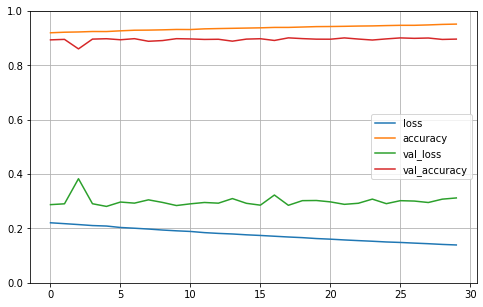

In [31]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8880


[0.3494212031364441, 0.8880000114440918]

In [33]:
X_new = X_test[:3]

In [35]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.95, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\pranj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


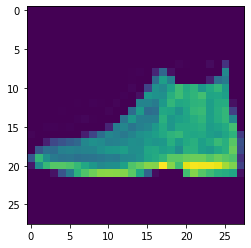

In [38]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


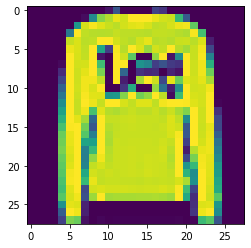

In [39]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


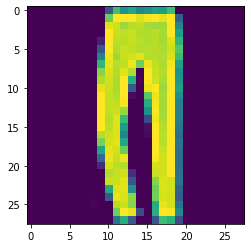

In [40]:
print(plt.imshow(X_test[2]))